# 0. Loading libraries

In [76]:
# Import pandas library 
import pandas as pd

import warnings
warnings.simplefilter("ignore")

from IPython.display import Image

# Import train_test_split to separate train and test set
from sklearn.model_selection import train_test_split

# Import MinMaxScaler to scale the features
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load avocado dataset and store it to variable dataframe
dataframe = pd.read_csv('Data/avocado.csv')
# Get the first 5 rows
dataframe.head()

,Date,AveragePrice,Total Volume,Small Hass Avocado,Large Hass Avocado,Extra Large Hass Avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [5]:
# Print a summary of dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      18249 non-null  object 
 1   AveragePrice              18249 non-null  float64
 2   Total Volume              18249 non-null  float64
 3   Small Hass Avocado        18249 non-null  float64
 4   Large Hass Avocado        18249 non-null  float64
 5   Extra Large Hass Avocado  18249 non-null  float64
 6   Total Bags                18249 non-null  float64
 7   Small Bags                18249 non-null  float64
 8   Large Bags                18249 non-null  float64
 9   XLarge Bags               18249 non-null  float64
 10  type                      18249 non-null  object 
 11  year                      18249 non-null  int64  
 12  region                    18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [13]:
# Use numerical variables to create DataFrame data
data = dataframe.select_dtypes(include = ['float64'])

# 1. Variable scale / Magnitude

In [14]:
# Print descriptive statistics of these variables to see variable's magnitudes
data.describe()

,AveragePrice,Total Volume,Small Hass Avocado,Large Hass Avocado,Extra Large Hass Avocado,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


As we can see, our variables have different magnitudes/scales. The minimum and maximum values of the variables are different. For example, the minimum value and maximum value of average price for avocado are 0.44 and 3.25, respectively. For small bags of avocados sold, the minimum and maximum values are 0 and 5.719097e+06, respectively.

In [16]:
# Get the range of numerical variables
for col in['AveragePrice', 'Total Volume', 'Small Hass Avocado','Large Hass Avocado', 'Extra Large Hass Avocado', 'Total Bags',
            'Small Bags', 'Large Bags', 'XLarge Bags']:
    print(col, 'range is: ', data[col].max() - data[col].min())

AveragePrice range is:  2.81
Total Volume range is:  62505561.96
Small Hass Avocado range is:  22743616.17
Large Hass Avocado range is:  20470572.61
Extra Large Hass Avocado range is:  2546439.11
Total Bags range is:  19373134.37
Small Bags range is:  13384586.8
Large Bags range is:  5719096.61
XLarge Bags range is:  551693.65


The ranges of our variables are different. 

# 2. Feature Scaling

Models such as logistic regression, linear regression, or other models that involve a matrix are very sensitive to different scales of input variables. If we use such data for model fitting, the result might end up creating a bias. Therefore feature scaling techniques are used before model fitting.

As you can guess, feature scaling techniques change the scale of the variables. There are several ways how you can scale your features. In this notebook, we'll demonstrate **MinMaxScaling** technique that scales variables to their minimum and maximum values. `scikit learn` offers `MinMaxScaler` class for this purpose. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

The formula for min-max scaling is: 

**X_std = (X - X.min(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0))**

**X_scaled = X_std * (max - min) + min**

- our Scaler subtracts the minimum value from all observations in our dataset and divide it by the range of values
- it will transform each feature individually between 0 and 1 

In [33]:
# Let's split our dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Total Volume', 'Small Hass Avocado','Large Hass Avocado', 
                                                          'Extra Large Hass Avocado', 'Total Bags', 
                                                          'Small Bags', 'Large Bags', 'XLarge Bags']],
                                                    data['AveragePrice'],
                                                    test_size = 0.3,
                                                    random_state = 42)
# Get the shape of X_train and X_test
X_train.shape, X_test.shape

((12774, 8), (5475, 8))

In [34]:
# Create MinMaxScaler object
scaler = MinMaxScaler()

In [35]:
# Fit X_train data with scaler: this computes and saves the minimum and maximum values 
scaler.fit(X_train)

MinMaxScaler()

In [36]:
# We can access the maximum values using .data_max attribute
scaler.data_max_

array([62505646.52, 22743616.17, 20445501.03,  1896149.5 , 19373134.37,
       13384586.8 ,  5719096.61,   454343.65])

In [37]:
# We can access the minimum values using .data_min attribute
scaler.data_min_

array([379.82,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ])

In [38]:
# Transform X_train and X_test with scaler and store it in variables X_train_scaled and X_test_scaled
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# let's have a look at the scaled training dataset
print('Mean: ', X_train_scaled.mean(axis=0))
print('Standard Deviation: ', X_train_scaled.std(axis=0))
print('Minimum value: ', X_train_scaled.min(axis=0))
print('Maximum value: ', X_train_scaled.max(axis=0))

Mean:  [0.01381517 0.01317261 0.01469731 0.012413   0.01240248 0.01364267
 0.00954372 0.00680544]
Standard Deviation:  [0.05564355 0.05642417 0.05993686 0.05728216 0.05014797 0.05504383
 0.04197211 0.0381179 ]
Minimum value:  [0. 0. 0. 0. 0. 0. 0. 0.]
Maximum value:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [40]:

print('Mean: ', X_test_scaled.mean(axis=0))
print('Standard Deviation: ', X_test_scaled.std(axis=0))
print('Minimum value: ', X_test_scaled.min(axis=0))
print('Maximum value: ', X_test_scaled.max(axis=0))

Mean:  [0.01310825 0.01220765 0.01382686 0.01118749 0.0122931  0.01354136
 0.00940189 0.00691122]
Standard Deviation:  [0.05431938 0.05368397 0.05637609 0.05521726 0.05263318 0.05735585
 0.04421344 0.04079549]
Minimum value:  [-4.72376194e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
Maximum value:  [0.8365426  0.7508327  1.00122626 1.34295271 0.84625047 0.936923
 0.75610389 1.21426513]


After this rescaling, all of the features have the range between 0 and 1.

### TASK

Imagine you've normalized the data using MinMaxScaler and delivered your work to the Senior Data scientist. He/she proposed you to scale the data using different scaling technique. The technique should transform data such that its distribution will have a mean value 0 and standard deviation of 1. Detective, find the right method [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

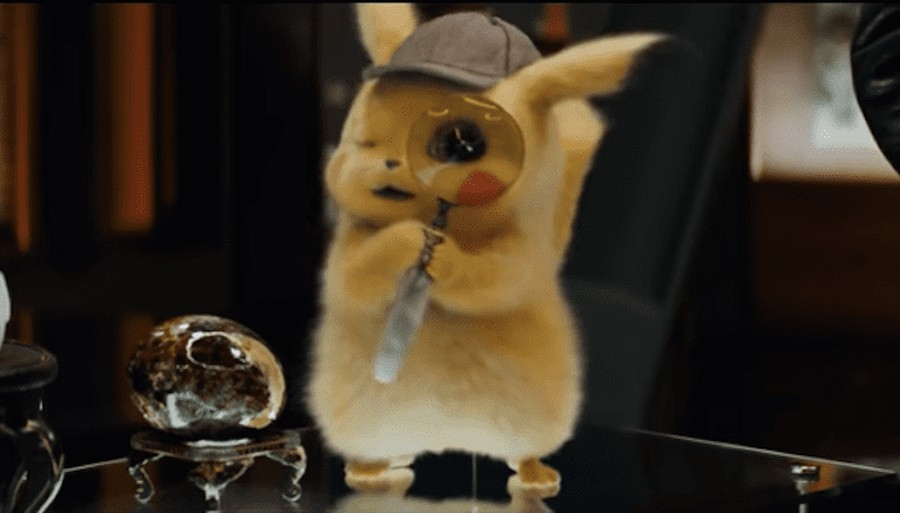

In [79]:
Image('Image/detective.jpg')

In [61]:
# TASK >>>> Import selected Scaling class
from sklearn.preprocessing import StandardScaler
# TASK >>>> Create scaler object
scaler_technique = StandardScaler()

In [62]:
# Fit X_train using scaler_technique
scaler_technique.fit(X_train)

StandardScaler()

In [63]:
# Print the scaled values
scaler_technique.mean_

array([863900.62200485, 299592.80090027, 300493.93694457,  23536.90062314,
       240274.93347659, 182601.48469704,  54581.44028887,   3092.00755128])

In [64]:
# Transform X_train using scaler_technique and store it in variable X_training_scaled
X_training_scaled = scaler_technique.transform(X_train)
# Print X_training_scaled
X_training_scaled

array([[-0.2470335 , -0.23307081, -0.24518142, ..., -0.24221355,
        -0.22727127, -0.17853653],
       [ 0.38575167,  0.95114752, -0.04266924, ...,  0.12612158,
         0.38057064, -0.17697059],
       [-0.24648986, -0.23332474, -0.24506811, ..., -0.24013427,
        -0.22507195, -0.17853653],
       ...,
       [-0.09026841, -0.2298404 ,  0.12637791, ..., -0.12633798,
        -0.22655094, -0.17853653],
       [-0.24515317, -0.23325558, -0.2370544 , ..., -0.24730356,
        -0.22490602, -0.17853653],
       [-0.178008  , -0.22765843, -0.09848868, ..., -0.17222378,
        -0.22040915, -0.17853653]])

In [65]:
# Repeat the scaling also for X_test and store it in variable X_testing_scaled
X_testing_scaled = scaler_technique.transform(X_test)
# Print X_testing_scaled
X_testing_scaled

array([[-0.22530843, -0.22089906, -0.23209191, ..., -0.20010482,
        -0.17750425, -0.17853653],
       [-0.15102346, -0.13303044, -0.14183488, ..., -0.16818228,
        -0.14337947, -0.17853653],
       [-0.17910136, -0.13215362, -0.21735266, ..., -0.17069775,
        -0.18266213,  0.35383824],
       ...,
       [-0.24478502, -0.23294502, -0.24112465, ..., -0.24335542,
        -0.21291923, -0.17853653],
       [-0.22290192, -0.23123422, -0.21616733, ..., -0.21513101,
        -0.12119394, -0.15236067],
       [-0.15747534, -0.05615708, -0.22350692, ..., -0.20481322,
        -0.10136296, -0.17853653]])

In [75]:
# Print mean and standard deviations of X_training_scaled
print('Mean: ', X_training_scaled.mean(axis=0))
print('Standard Deviation: ', X_training_scaled.std(axis=0))

Mean:  [ 1.55747586e-17  1.33497931e-17 -8.89986204e-18  3.55994482e-17
 -7.23113791e-18 -6.67489653e-18  7.78737929e-18  2.94807930e-17]
Standard Deviation:  [1. 1. 1. 1. 1. 1. 1. 1.]


# Appendix

Data source: 

Avocado dataset: https://www.kaggle.com/neuromusic/avocado-prices

Data license: Database: Open Database